In [27]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import geopandas
import descartes

from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.spatial import Voronoi
from geovoronoi import voronoi_regions_from_coords

from voronoi_helper import voronoi_finite_polygons_2d
from matplotlib.collections import PatchCollection

import fiona

In [2]:
path = "/home/administrator/Documents/Web-based-data/Project/MobilePhoneData/"
map_senegal = geopandas.read_file(path + "ContextData/Shapefile_Senegal/senegal_arr_2014_wgs.shp")


In [3]:
map_senegal_reg = map_senegal.dissolve(by='REG')
map_senegal_reg = map_senegal_reg.filter(['REG', 'geometry'])
map_senegal_reg['region'] = map_senegal_reg.index.str.capitalize()
map_senegal_reg.at['SAINT-LOUIS', 'region'] = "Saint-Louis"
map_senegal_reg

,geometry,region
REG,,
DAKAR,"MULTIPOLYGON (((-17.25399 14.70386, -17.25399 ...",Dakar
DIOURBEL,"MULTIPOLYGON (((-15.83842 15.02861, -15.83842 ...",Diourbel
FATICK,"POLYGON ((-16.20614 13.88153, -16.20771 13.877...",Fatick
KAFFRINE,"POLYGON ((-14.58974 14.10847, -14.58995 14.107...",Kaffrine
KAOLACK,"POLYGON ((-15.54544 13.81631, -15.54488 13.816...",Kaolack
KEDOUGOU,"POLYGON ((-11.86784 12.41995, -11.86934 12.420...",Kedougou
KOLDA,"POLYGON ((-13.61122 12.67496, -13.62016 12.674...",Kolda
LOUGA,"POLYGON ((-14.77902 15.45738, -14.77846 15.449...",Louga
MATAM,"POLYGON ((-12.92529 15.44199, -12.92532 15.438...",Matam


In [4]:
mal_inc = pd.read_csv("/home/administrator/Documents/Web-based-data/Project/MalariaIncidence/INCIDENCE_RATE-per1000.csv")
mal_inc = mal_inc[mal_inc.year == 2013]
mal_inc = mal_inc[mal_inc.admin_unit != "Senegal"]
mal_inc = mal_inc.filter(['admin_unit', 'mean_value'])
mal_inc = mal_inc.rename(columns = {"admin_unit": "REG", "mean_value": "inc_rate"})

In [5]:
mal_inc


,REG,inc_rate
0,Dakar,60.298439
2,Diourbel,39.331244
4,Fatick,43.484102
6,Kaffrine,38.200650
8,Kaolack,37.719223
10,Kedougou,139.921531
12,Kolda,119.758282
14,Louga,39.091685
16,Matam,50.528903
18,Saint-Louis,39.219976


In [6]:
map_senegal_reg.merge(mal_inc, left_on = 'region', right_on = 'REG', how = 'outer')

,geometry,region,REG,inc_rate
0,"MULTIPOLYGON (((-17.25399 14.70386, -17.25399 ...",Dakar,Dakar,60.298439
1,"MULTIPOLYGON (((-15.83842 15.02861, -15.83842 ...",Diourbel,Diourbel,39.331244
2,"POLYGON ((-16.20614 13.88153, -16.20771 13.877...",Fatick,Fatick,43.484102
3,"POLYGON ((-14.58974 14.10847, -14.58995 14.107...",Kaffrine,Kaffrine,38.200650
4,"POLYGON ((-15.54544 13.81631, -15.54488 13.816...",Kaolack,Kaolack,37.719223
5,"POLYGON ((-11.86784 12.41995, -11.86934 12.420...",Kedougou,Kedougou,139.921531
6,"POLYGON ((-13.61122 12.67496, -13.62016 12.674...",Kolda,Kolda,119.758282
7,"POLYGON ((-14.77902 15.45738, -14.77846 15.449...",Louga,Louga,39.091685
8,"POLYGON ((-12.92529 15.44199, -12.92532 15.438...",Matam,Matam,50.528903
9,"POLYGON ((-16.14496 16.00284, -16.14355 16.000...",Saint-Louis,Saint-Louis,39.219976


In [38]:
map_senegal_reg['coords'] = map_senegal_reg['geometry'].apply(lambda x: x.representative_point().coords[:])
map_senegal_reg['coords'] = [coords[0] for coords in map_senegal_reg['coords']]
map_senegal_reg = map_senegal_reg.rename(columns = {"coords": "rep_point"})

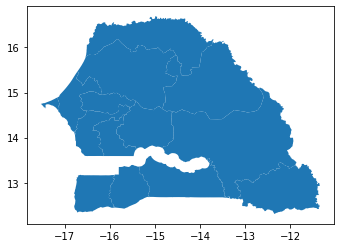

In [30]:
map_senegal_reg.plot()

In [7]:
map_senegal['coords'] = map_senegal['geometry'].apply(lambda x: x.representative_point().coords[:])
map_senegal['coords'] = [coords[0] for coords in map_senegal['coords']]
map_senegal = map_senegal.rename(columns = {"coords": "rep_point"})

In [8]:
map_senegal.head()

,ARR_ID,REG,DEPT,ARR,geometry,rep_point
0,1,DAKAR,DAKAR,PARCELLES ASSAINIES,"POLYGON ((-17.42284 14.76764, -17.42329 14.767...","(-17.44249743592356, 14.750501149818676)"
1,2,DAKAR,DAKAR,ALMADIES,"MULTIPOLYGON (((-17.51195 14.75673, -17.51161 ...","(-17.491730821356356, 14.732235066948933)"
2,3,DAKAR,DAKAR,GRAND DAKAR,"POLYGON ((-17.42018 14.73348, -17.42003 14.733...","(-17.446755032138725, 14.712288180561526)"
3,4,DAKAR,DAKAR,DAKAR PLATEAU,"MULTIPOLYGON (((-17.43267 14.64669, -17.43276 ...","(-17.444103370447344, 14.676939556530098)"
4,5,DAKAR,GUEDIAWAYE,GUEDIAWAYE,"POLYGON ((-17.36185 14.79812, -17.35965 14.793...","(-17.398030296409125, 14.771494526587166)"


In [9]:
SE_ind = pd.read_csv("/home/administrator/Documents/Web-based-data/Project/SECovariates/social_ind.csv")
SE_ind['REG'] = SE_ind.region.str.upper()
SE_ind['lit_q'] = pd.qcut(SE_ind['literacy_rate'], 4, labels = [4, 3, 2, 1])
SE_ind['school_q'] = pd.qcut(SE_ind['schooling_rate'], 4, labels = [4, 3, 2, 1])
SE_ind['poverty_q'] = pd.qcut(SE_ind['poverty_rate'], 4, labels = [1, 2, 3, 4])
SE_ind

,region,literacy_rate,schooling_rate,poverty_rate,REG,lit_q,school_q,poverty_q
0,Dakar,68.6,64.3,26.1,DAKAR,1,1,1
1,Diourbel,35.1,28.9,47.8,DIOURBEL,4,4,2
2,Tambacounda,35.0,44.6,62.5,TAMBACOUNDA,4,3,3
3,Saint-Louis,53.2,57.4,39.7,SAINT-LOUIS,1,2,1
4,Thies,53.8,53.4,41.3,THIES,1,2,1
5,Fatick,45.8,61.1,67.8,FATICK,2,2,4
6,Kaffrine,42.0,26.7,63.8,KAFFRINE,3,4,3
7,Kaolack,50.2,46.4,61.7,KAOLACK,2,3,2
8,Kedougou,35.0,63.2,71.3,KEDOUGOU,4,1,4
9,Kolda,43.7,51.9,76.6,KOLDA,3,3,4


In [10]:
other_SE_ind = pd.read_csv("/home/administrator/Documents/Web-based-data/Project/SECovariates/SE_other_indicators.csv")
other_SE_ind = other_SE_ind.filter(['location', 'indicator', 'Value'])
other_SE_ind = other_SE_ind.pivot_table(index = 'location', columns = 'indicator', values = 'Value')
other_SE_ind['REG'] = other_SE_ind.index.str.upper()
other_SE_ind

indicator,Apartment building,Electricity,Infant Mortality of children under five years,Juvenile Mortality of children under five years,Life expectancy at birth,Other Accommodations,Storey house,Total Population,booth,candle,hut,low house,wood,REG
location,,,,,,,,,,,,,,
Dakar,8.0,93.8,45.8,16.7,69.6,9.1,7.3,3137196.0,25.9,4.5,35.7,13.9,0.1,DAKAR
Diourbel,4.6,50.6,67.8,32.2,62.8,7.4,6.0,1497455.0,33.2,12.6,32.5,16.4,1.3,DIOURBEL
Fatick,5.8,27.4,52.4,22.3,65.1,5.2,7.7,714392.0,34.5,9.6,26.8,20.0,0.9,FATICK
Kaffrine,4.7,13.8,59.4,31.4,62.9,4.7,6.7,566992.0,37.7,8.9,25.8,20.4,2.3,KAFFRINE
Kaolack,5.8,40.0,57.5,25.0,64.6,5.7,7.6,960875.0,34.1,10.6,27.3,19.5,0.8,KAOLACK
Kedougou,5.2,15.7,95.6,64.8,55.0,9.0,5.9,151357.0,30.1,8.3,34.1,15.7,6.0,KEDOUGOU
Kolda,4.7,20.3,100.6,63.1,54.7,5.7,6.5,662455.0,35.1,24.6,30.2,17.9,8.3,KOLDA
Louga,5.4,34.9,57.3,24.5,66.2,6.4,6.3,874193.0,33.0,7.4,32.5,16.4,4.9,LOUGA
Matam,10.4,32.9,62.4,31.3,60.4,6.3,9.5,562539.0,29.0,2.3,25.6,19.1,9.7,MATAM


In [11]:
all_SE_ind = other_SE_ind.merge(SE_ind, on = 'REG')

all_SE_ind = all_SE_ind.drop(['region', 'Apartment building', 'Other Accommodations', 'Storey house', 
                             'low house'], 1)

all_SE_ind = all_SE_ind.rename(columns = {"Infant Mortality of children under five years": "mort_infant", 
                                            "Juvenile Mortality of children under five years": "mort_juvenile", 
                                         "Life expectancy at birth": "life_exp", 
                                         "Total Population": "total_pop"})
all_SE_ind.head()

,Electricity,mort_infant,mort_juvenile,life_exp,total_pop,booth,candle,hut,wood,REG,literacy_rate,schooling_rate,poverty_rate,lit_q,school_q,poverty_q
0,93.8,45.8,16.7,69.6,3137196.0,25.9,4.5,35.7,0.1,DAKAR,68.6,64.3,26.1,1,1,1
1,50.6,67.8,32.2,62.8,1497455.0,33.2,12.6,32.5,1.3,DIOURBEL,35.1,28.9,47.8,4,4,2
2,27.4,52.4,22.3,65.1,714392.0,34.5,9.6,26.8,0.9,FATICK,45.8,61.1,67.8,2,2,4
3,13.8,59.4,31.4,62.9,566992.0,37.7,8.9,25.8,2.3,KAFFRINE,42.0,26.7,63.8,3,4,3
4,40.0,57.5,25.0,64.6,960875.0,34.1,10.6,27.3,0.8,KAOLACK,50.2,46.4,61.7,2,3,2


In [12]:
map_ind_sen = map_senegal.merge(all_SE_ind, on = 'REG', how = 'outer')
map_ind_sen.head()

,ARR_ID,REG,DEPT,ARR,geometry,rep_point,Electricity,mort_infant,mort_juvenile,life_exp,...,booth,candle,hut,wood,literacy_rate,schooling_rate,poverty_rate,lit_q,school_q,poverty_q
0,1,DAKAR,DAKAR,PARCELLES ASSAINIES,"POLYGON ((-17.42284 14.76764, -17.42329 14.767...","(-17.44249743592356, 14.750501149818676)",93.8,45.8,16.7,69.6,...,25.9,4.5,35.7,0.1,68.6,64.3,26.1,1,1,1
1,2,DAKAR,DAKAR,ALMADIES,"MULTIPOLYGON (((-17.51195 14.75673, -17.51161 ...","(-17.491730821356356, 14.732235066948933)",93.8,45.8,16.7,69.6,...,25.9,4.5,35.7,0.1,68.6,64.3,26.1,1,1,1
2,3,DAKAR,DAKAR,GRAND DAKAR,"POLYGON ((-17.42018 14.73348, -17.42003 14.733...","(-17.446755032138725, 14.712288180561526)",93.8,45.8,16.7,69.6,...,25.9,4.5,35.7,0.1,68.6,64.3,26.1,1,1,1
3,4,DAKAR,DAKAR,DAKAR PLATEAU,"MULTIPOLYGON (((-17.43267 14.64669, -17.43276 ...","(-17.444103370447344, 14.676939556530098)",93.8,45.8,16.7,69.6,...,25.9,4.5,35.7,0.1,68.6,64.3,26.1,1,1,1
4,5,DAKAR,GUEDIAWAYE,GUEDIAWAYE,"POLYGON ((-17.36185 14.79812, -17.35965 14.793...","(-17.398030296409125, 14.771494526587166)",93.8,45.8,16.7,69.6,...,25.9,4.5,35.7,0.1,68.6,64.3,26.1,1,1,1


In [21]:
map_ind_sen['electricity_q'] = pd.qcut(map_ind_sen['Electricity'], 4, labels = [4, 3, 2, 1])
map_ind_sen['mort_infant_q'] = pd.qcut(map_ind_sen['mort_infant'], 4, labels = [1, 2, 3, 4])
map_ind_sen['mort_juvenile_q'] = pd.qcut(map_ind_sen['mort_juvenile'], 4, labels = [1, 2, 3, 4])
map_ind_sen['life_exp_q'] = pd.qcut(map_ind_sen['life_exp'], 4, labels = [4, 3, 2, 1])
map_ind_sen['booth_q'] = pd.qcut(map_ind_sen['booth'], 4, labels = [1, 2, 3, 4])

map_ind_sen[map_ind_sen.columns[18:27]] = map_ind_sen[map_ind_sen.columns[18:27]].astype(int)
map_ind_sen['overall_SE_ind'] = map_ind_sen[map_ind_sen.columns[18:27]].mean(axis=1)

map_ind_sen.head()

,ARR_ID,REG,DEPT,ARR,geometry,rep_point,Electricity,mort_infant,mort_juvenile,life_exp,...,poverty_rate,lit_q,school_q,poverty_q,electricity_q,mort_infant_q,mort_juvenile_q,life_exp_q,booth_q,overall_SE_ind
0,1,DAKAR,DAKAR,PARCELLES ASSAINIES,"POLYGON ((-17.42284 14.76764, -17.42329 14.767...","(-17.44249743592356, 14.750501149818676)",93.8,45.8,16.7,69.6,...,26.1,1,1,1,1,1,1,1,1,1.0
1,2,DAKAR,DAKAR,ALMADIES,"MULTIPOLYGON (((-17.51195 14.75673, -17.51161 ...","(-17.491730821356356, 14.732235066948933)",93.8,45.8,16.7,69.6,...,26.1,1,1,1,1,1,1,1,1,1.0
2,3,DAKAR,DAKAR,GRAND DAKAR,"POLYGON ((-17.42018 14.73348, -17.42003 14.733...","(-17.446755032138725, 14.712288180561526)",93.8,45.8,16.7,69.6,...,26.1,1,1,1,1,1,1,1,1,1.0
3,4,DAKAR,DAKAR,DAKAR PLATEAU,"MULTIPOLYGON (((-17.43267 14.64669, -17.43276 ...","(-17.444103370447344, 14.676939556530098)",93.8,45.8,16.7,69.6,...,26.1,1,1,1,1,1,1,1,1,1.0
4,5,DAKAR,GUEDIAWAYE,GUEDIAWAYE,"POLYGON ((-17.36185 14.79812, -17.35965 14.793...","(-17.398030296409125, 14.771494526587166)",93.8,45.8,16.7,69.6,...,26.1,1,1,1,1,1,1,1,1,1.0


In [22]:
list(map_ind_sen.columns)


['ARR_ID',
 'REG',
 'DEPT',
 'ARR',
 'geometry',
 'rep_point',
 'Electricity',
 'mort_infant',
 'mort_juvenile',
 'life_exp',
 'total_pop',
 'booth',
 'candle',
 'hut',
 'wood',
 'literacy_rate',
 'schooling_rate',
 'poverty_rate',
 'lit_q',
 'school_q',
 'poverty_q',
 'electricity_q',
 'mort_infant_q',
 'mort_juvenile_q',
 'life_exp_q',
 'booth_q',
 'overall_SE_ind']

Text(111.25000000000006, 0.5, 'latitude')

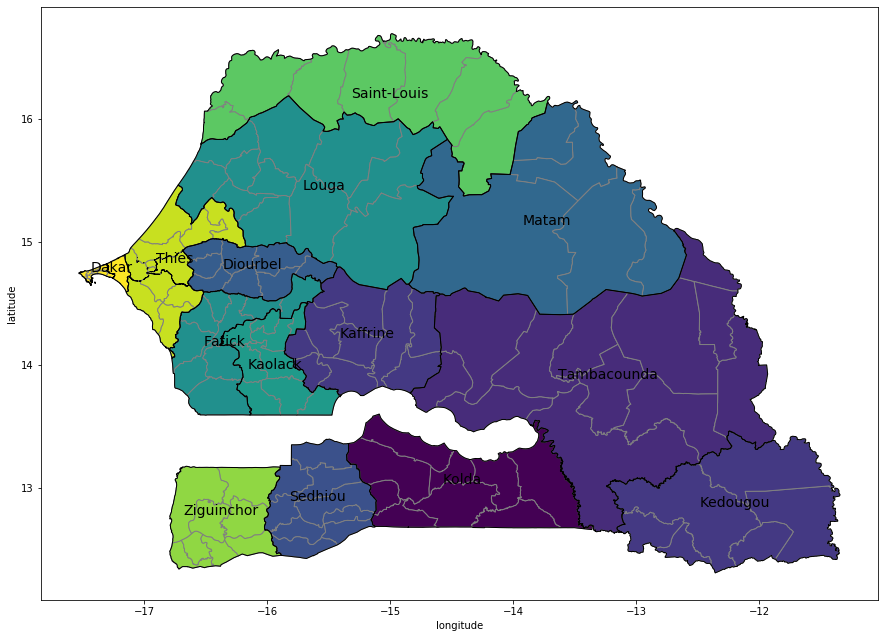

In [103]:
fig, ax = plt.subplots(figsize = (15, 15))
divider = make_axes_locatable(ax)


p = map_ind_sen.plot(column='overall_SE_ind', ax=ax, 
                 cmap = 'viridis_r', edgecolor='grey', legend = False)
map_senegal_reg.plot(ax=ax, color = 'none', edgecolor='black')
map_senegal_reg.apply(lambda x: p.annotate(s=x.region, xy=x.geometry.centroid.coords[0], 
                                           ha='center', size = 14, color = 'k'),axis=1)
plt.xlabel('longitude')
plt.ylabel('latitude')


Text(0.5, 1, 'High                                                                                                                                                                                                 Low')

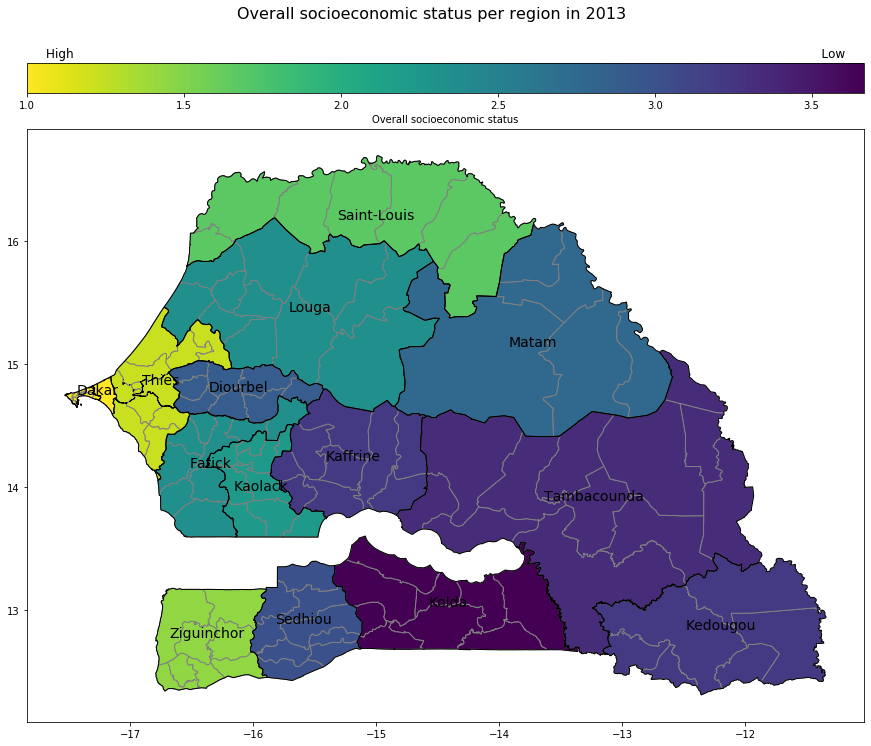

In [118]:
fig, ax = plt.subplots(figsize = (15, 15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.5)


p = map_ind_sen.plot(column='overall_SE_ind', ax=ax, legend=True,
                 cmap = 'viridis_r', edgecolor='grey', cax = cax,
                 legend_kwds={'label': "Overall socioeconomic status", 'orientation': "horizontal"})
map_senegal_reg.plot(ax=ax, cax = cax, color = 'none', edgecolor='black')
map_senegal_reg.apply(lambda x: p.annotate(s=x.region, xy=x.geometry.centroid.coords[0], 
                                           ha='center', size = 14, color = 'k'),axis=1)

plt.suptitle("Overall socioeconomic status per region in 2013", fontsize=16,  y=0.86)
plt.title("High                                                                                                                                                                                                 Low")


In [28]:
map_ind_sen.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 27 columns):
ARR_ID             123 non-null int64
REG                123 non-null object
DEPT               123 non-null object
ARR                123 non-null object
geometry           123 non-null geometry
rep_point          123 non-null object
Electricity        123 non-null float64
mort_infant        123 non-null float64
mort_juvenile      123 non-null float64
life_exp           123 non-null float64
total_pop          123 non-null float64
booth              123 non-null float64
candle             123 non-null float64
hut                123 non-null float64
wood               123 non-null float64
literacy_rate      123 non-null float64
schooling_rate     123 non-null float64
poverty_rate       123 non-null float64
lit_q              123 non-null int64
school_q           123 non-null int64
poverty_q          123 non-null int64
electricity_q      123 non-null int64
mort_infant_q      1

In [29]:
map_ind_sen.to_file("/home/administrator/Documents/Web-based-data/Project/SECovariates/Map_ind_sen.shp")

ValueError: Invalid field type <class 'tuple'>

In [185]:
arr_number = map_ind_sen.filter(['REG', 'ARR_ID', 'total_pop'])
arr_number.head()

,REG,ARR_ID,total_pop
0,DAKAR,1,3137196.0
1,DAKAR,2,3137196.0
2,DAKAR,3,3137196.0
3,DAKAR,4,3137196.0
4,DAKAR,5,3137196.0


In [186]:
arr_number_per_region = arr_number.groupby('REG').count()
arr_number_per_region = arr_number_per_region.drop('total_pop', axis = 1)
arr_number_per_region = arr_number_per_region.rename(columns = {'ARR_ID': 'n_arr'})
arr_number_per_region

,n_arr
REG,
DAKAR,10
DIOURBEL,8
FATICK,9
KAFFRINE,9
KAOLACK,8
KEDOUGOU,6
KOLDA,9
LOUGA,11
MATAM,5


In [187]:
arr_number_per_region = arr_number_per_region.merge(arr_number, on = 'REG')
arr_number_per_region = arr_number_per_region.rename(columns = {'total_pop': 'region_pop'})


In [188]:
arr_number_per_region['arr_pop'] = arr_number_per_region['region_pop']/arr_number_per_region['n_arr']

In [190]:
arr_number_per_region.head()

,REG,n_arr,ARR_ID,region_pop,arr_pop
0,DAKAR,10,1,3137196.0,313719.600
1,DAKAR,10,2,3137196.0,313719.600
2,DAKAR,10,3,3137196.0,313719.600
3,DAKAR,10,4,3137196.0,313719.600
4,DAKAR,10,5,3137196.0,313719.600
5,DAKAR,10,6,3137196.0,313719.600
6,DAKAR,10,7,3137196.0,313719.600
7,DAKAR,10,8,3137196.0,313719.600
8,DAKAR,10,9,3137196.0,313719.600
9,DAKAR,10,10,3137196.0,313719.600


In [191]:
arr_number_per_region.to_csv("/home/administrator/Documents/Web-based-data/Project/SECovariates/population.csv")

## Weather Indicators

In [192]:
cities = pd.read_csv("/home/administrator/Documents/Web-based-data/Project/EcologicalCovariates/cities.csv")
cities_geom = geopandas.GeoDataFrame(cities, geometry=geopandas.points_from_xy(cities.lon, cities.lat))
cities_geom.head()

,city,lat,lon,geometry
0,Dakar,14.693425,-17.447938,POINT (-17.44794 14.69342)
1,"Touba, Senegal",14.864559,-15.876047,POINT (-15.87605 14.86456)
2,Thies,14.794809,-16.952927,POINT (-16.95293 14.79481)
3,Rufisque,14.716417,-17.273844,POINT (-17.27384 14.71642)
4,Kaolack,13.963176,-15.788883,POINT (-15.78888 13.96318)


In [196]:
vor = Voronoi(cities[["lon", "lat"]].values)
regions, vertices = voronoi_finite_polygons_2d(vor)

In [197]:
def add_first(array):
    return np.concatenate((array, [array[0]]))

In [206]:
df_map_elements = geopandas.read_file("/home/administrator/Documents/Web-based-data/Project/MobilePhoneData/ContextData/Shapefile_Senegal/senegal_arr_2014_wgs.shp")

df_map_elements["mpl_polygon"] = np.nan
df_map_elements['mpl_polygon'] = df_map_elements['mpl_polygon'].astype(object)


for self_index, self_row_df in df_map_elements.iterrows():
    m_polygon = self_row_df['geometry']
    poly=[]
    if m_polygon.geom_type == 'MultiPolygon':
        for pol in m_polygon:
            poly.append(descartes.PolygonPatch(pol))
    else:
        poly.append(descartes.PolygonPatch(m_polygon))
    df_map_elements.set_value(self_index, 'mpl_polygon', poly)

dict_mapindex_mpl_polygon = df_map_elements['mpl_polygon'].to_dict()

/home/administrator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


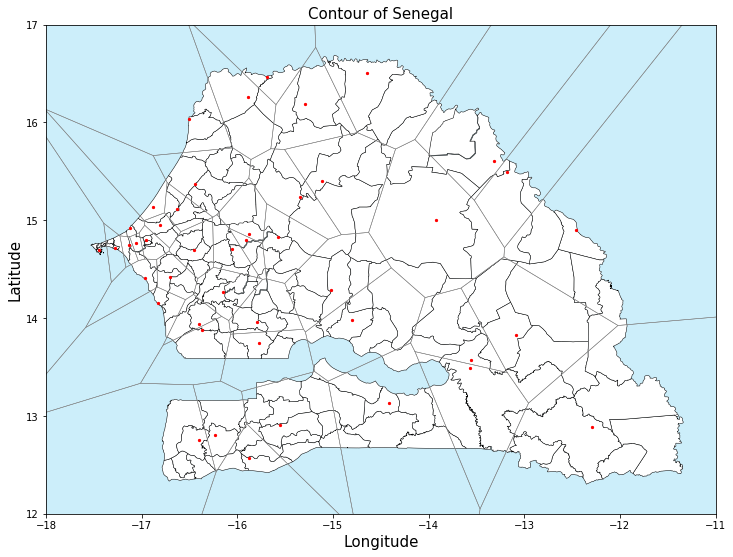

In [211]:
WATER_RGB = (204/255, 238/255, 250/255)
FACTOR = 1.5
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8*FACTOR, 6*FACTOR))
for c_l ,patches in dict_mapindex_mpl_polygon.items():
    p = PatchCollection(patches, color='white', lw=.5, edgecolor='k')
    ax.add_collection(p)
    
ax.set_facecolor(WATER_RGB)
ax.scatter(cities["lon"], cities["lat"], s=5, color='red')
ax.set_ylabel("Latitude", fontsize=15)
ax.set_xlabel("Longitude", fontsize=15)
ax.set_title("Contour of Senegal", fontsize=15)
ax.set_xlim([-18, -11])
ax.set_ylim([12, 17])

for region in regions:
    temp_polygon = add_first(vertices[region])
    #ax.fill(temp_polygon[:, 0], temp_polygon[:, 1], alpha=0.4)
    ax.plot(temp_polygon[:, 0], temp_polygon[:, 1], color='grey', linewidth=0.5)

ax.autoscale_view()